# Chapter 15. Recurrent Networks

## Exercise #9

### Train a classification model for the SketchRNN dataset, available in TensorFlow Datasets.

In [1]:
from pathlib import Path
import os
import sys
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DOWNLOAD_ROOT = "http://download.tensorflow.org/data/"
FILENAME = "quickdraw_tutorial_dataset_v1.tar.gz"
filepath = keras.utils.get_file(FILENAME,
                                DOWNLOAD_ROOT + FILENAME,
                                cache_subdir="datasets/quickdraw",
                                extract=True)

In [3]:
quickdraw_dir = Path(filepath).parent
train_files = sorted([str(path) for path in quickdraw_dir.glob("training.tfrecord-*")])
eval_files = sorted([str(path) for path in quickdraw_dir.glob("eval.tfrecord-*")])

In [4]:
train_files

['C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\training.tfrecord-00000-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\training.tfrecord-00001-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\training.tfrecord-00002-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\training.tfrecord-00003-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\training.tfrecord-00004-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\training.tfrecord-00005-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\training.tfrecord-00006-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\training.tfrecord-00007-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\training.tfrecord-00008-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\training.tfrecord-00009-of-00010']

In [5]:
eval_files

['C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\eval.tfrecord-00000-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\eval.tfrecord-00001-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\eval.tfrecord-00002-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\eval.tfrecord-00003-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\eval.tfrecord-00004-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\eval.tfrecord-00005-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\eval.tfrecord-00006-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\eval.tfrecord-00007-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\eval.tfrecord-00008-of-00010',
 'C:\\Users\\Diamondbot\\.keras\\datasets\\quickdraw\\eval.tfrecord-00009-of-00010']

In [6]:
with open(quickdraw_dir / "eval.tfrecord.classes") as test_classes_file:
  test_classes = test_classes_file.readlines()

with open(quickdraw_dir / "training.tfrecord.classes") as train_classes_file:
  train_classes = train_classes_file.readlines()

In [7]:
assert train_classes == test_classes
class_names=[]
for name in range(len(train_classes)):
  class_name = train_classes[name].strip().lower()
  class_names.append(class_name)

In [8]:
sorted(class_names)

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm',
 'asparagus',
 'axe',
 'backpack',
 'banana',
 'bandage',
 'barn',
 'baseball',
 'baseball bat',
 'basket',
 'basketball',
 'bat',
 'bathtub',
 'beach',
 'bear',
 'beard',
 'bed',
 'bee',
 'belt',
 'bench',
 'bicycle',
 'binoculars',
 'bird',
 'birthday cake',
 'blackberry',
 'blueberry',
 'book',
 'boomerang',
 'bottlecap',
 'bowtie',
 'bracelet',
 'brain',
 'bread',
 'bridge',
 'broccoli',
 'broom',
 'bucket',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cactus',
 'cake',
 'calculator',
 'calendar',
 'camel',
 'camera',
 'camouflage',
 'campfire',
 'candle',
 'cannon',
 'canoe',
 'car',
 'carrot',
 'castle',
 'cat',
 'ceiling fan',
 'cell phone',
 'cello',
 'chair',
 'chandelier',
 'church',
 'circle',
 'clarinet',
 'clock',
 'cloud',
 'coffee cup',
 'compass',
 'computer',
 'cookie',
 'cooler',
 'couch',
 'cow',
 'crab',
 'crayon',
 'crocodile',
 'crow

In [9]:
tfrecpath = "/Users/diamondbot/.keras/datasets/quickdraw/training.tfrecord-00009-of-00010"
os.path.exists(tfrecpath)

True

In [10]:
raw_dataset = tf.data.TFRecordDataset(tfrecpath)

for raw_record in raw_dataset.take(1):
  example = tf.train.Example()
  example.ParseFromString(raw_record.numpy())
  print(example)

features {
  feature {
    key: "class_index"
    value {
      int64_list {
        value: 22
      }
    }
  }
  feature {
    key: "ink"
    value {
      float_list {
        value: 0.05349794030189514
        value: -0.23137253522872925
        value: 0.0
        value: 0.037037044763565063
        value: -0.09019608795642853
        value: 0.0
        value: 0.04938271641731262
        value: -0.05490196496248245
        value: 0.0
        value: 0.0905349850654602
        value: -0.0627450942993164
        value: 0.0
        value: 0.0658436119556427
        value: -0.027450980618596077
        value: 0.0
        value: 0.18106994032859802
        value: -0.027450980618596077
        value: 0.0
        value: 0.15226340293884277
        value: 0.007843137718737125
        value: 0.0
        value: 0.11934155225753784
        value: 0.04313725605607033
        value: 0.0
        value: 0.032921791076660156
        value: 0.027450982481241226
        value: 0.0
        value: 0.11

In [11]:
def parse(data_batch):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(data_batch, feature_descriptions)
    flat_sketches = tf.sparse.to_dense(examples["ink"])
    sketches = tf.reshape(flat_sketches, shape=[tf.size(data_batch), -1, 3])
    lengths = examples["shape"][:, 0]
    labels = examples["class_index"][:, 0]
    return sketches, lengths, labels

In [12]:
def quickdraw_dataset(filepaths, batch_size=32, shuffle_buffer_size=None,
                      n_parse_threads=5, n_read_threads=5, cache=False):
  dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=n_read_threads)
  if cache:
    dataset.cache()
  if shuffle_buffer_size:
    dataset.shuffle(shuffle_buffer_size)
  dataset = dataset.batch(batch_size)
  dataset = dataset.map(parse, num_parallel_calls=n_parse_threads)
  return dataset.prefetch(1)

In [13]:
train_set = quickdraw_dataset(train_files, shuffle_buffer_size=10000)
valid_set = quickdraw_dataset(eval_files[:5])
test_set = quickdraw_dataset(eval_files[5:])

In [14]:
for sketches, lengths, labels in train_set.take(1):
  print("sketches = ", sketches)
  print("lengths = ", lengths )
  print("labels = ", labels)

sketches =  tf.Tensor(
[[[ 0.01968503  0.05095541  0.        ]
  [ 0.03149611  0.03184712  0.        ]
  [ 0.12204725 -0.01273882  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.15686277  0.          0.        ]
  [-0.04705882  0.01851851  0.        ]
  [-0.09411766  0.05555555  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.09842521  0.0608108   0.        ]
  [-0.09842519  0.09459461  0.        ]
  [-0.09055118  0.14864865  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ...

 [[-0.0236221  -0.03048781  1.        ]
  [ 0.0236221   0.03048781  0.        ]
  [-0.05905515 -0.0487805   0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.   

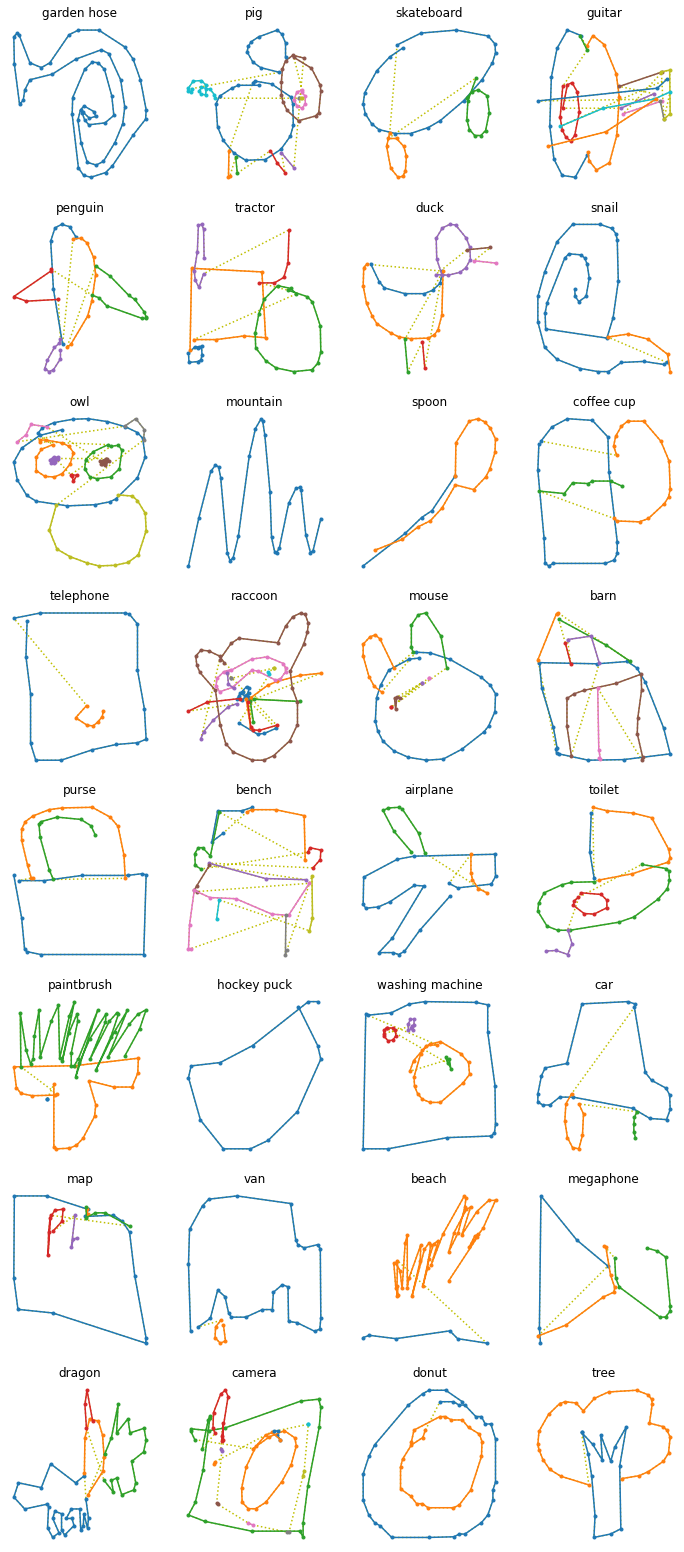

In [15]:
def draw_sketch(sketch, label=None):
  origin = np.array([[0., 0., 0.]])
  #print(origin)
  sketch = np.r_[origin, sketch]
  #print(sketch)
  stroke_end_indices = np.argwhere(sketch[:, -1]==1)[:, 0]
  coordinates = np.cumsum(sketch[:, :2], axis=0)
  strokes = np.split(coordinates, stroke_end_indices + 1)
  title = class_names[label.numpy()] if label is not None else "Try to guess"
  plt.title(title)
  #print(coordinates[:,0])
  #print(coordinates[:,1])
  plt.plot(coordinates[:,0], -coordinates[:, 1], "y:")
  for stroke in strokes:
    plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
  plt.axis("off")

def draw_sketches(sketches, lengths, labels):
  n_sketches = len(sketches)
  n_cols = 4
  n_rows = (n_sketches - 1) // n_cols + 1
  plt.figure(figsize=(n_cols * 3, n_rows * 3.5)) 
  for index, sketch, length, label in zip(range(n_sketches), sketches, lengths, labels):
    plt.subplot(n_rows, n_cols, index + 1)
    draw_sketch(sketch[:length], label)
  plt.show()

for sketches, lengths, labels in train_set.take(1):
  draw_sketches(sketches, lengths, labels)

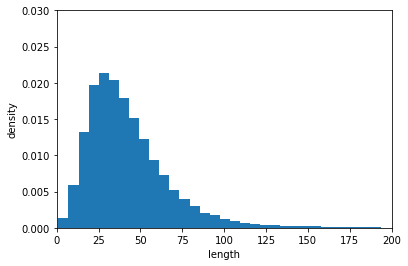

In [16]:
lengths = np.concatenate([lengths for _, lengths, _ in train_set.take(1000)])
plt.hist(lengths, bins=150, density=True)
plt.axis([0, 200, 0, 0.03])
plt.xlabel("length")
plt.ylabel("density")
plt.show()

In [17]:
def crop_long_sketches(dataset, max_length=100):
  return dataset.map(lambda inks, lengths, labels: (inks[:, :max_length], labels))

cropped_train_set = crop_long_sketches(train_set)
cropped_valid_set = crop_long_sketches(valid_set)
cropped_test_set = crop_long_sketches(test_set)

In [18]:
model = keras.models.Sequential([
  keras.layers.Conv1D(32, kernel_size=5, strides=2, activation="relu"),
  keras.layers.BatchNormalization(),
  keras.layers.Conv1D(64, kernel_size=5, strides=2, activation="relu"),
  keras.layers.BatchNormalization(),
  keras.layers.Conv1D(128, kernel_size=3, strides=2, activation="relu"),
  keras.layers.BatchNormalization(),
  keras.layers.LSTM(128, return_sequences=True),
  keras.layers.LSTM(128),
  keras.layers.Dense(len(class_names), activation="softmax")
])

optimizer = keras.optimizers.SGD(learning_rate=1e-2, clipnorm=1.)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy", "sparse_top_k_categorical_accuracy"])
history = model.fit(cropped_train_set, epochs=2, validation_data=cropped_valid_set)

Epoch 1/2
107813/107813 [==============================] - 1744s 16ms/step - loss: 4.1032 - accuracy: 0.1667 - sparse_top_k_categorical_accuracy: 0.3691 - val_loss: 3.0646 - val_accuracy: 0.3127 - val_sparse_top_k_categorical_accuracy: 0.5987
Epoch 2/2
107813/107813 [==============================] - 1686s 16ms/step - loss: 2.7159 - accuracy: 0.3773 - sparse_top_k_categorical_accuracy: 0.6665 - val_loss: 2.5183 - val_accuracy: 0.4114 - val_sparse_top_k_categorical_accuracy: 0.7016


In [19]:
y_test = np.concatenate([labels for _, _, labels in test_set])
y_probas = model.predict(test_set)

In [20]:
np.mean(keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_probas))

0.607542

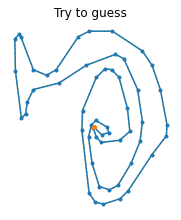

Top-5 predictions:
  1. garden hose  30.439%
  2. snail  26.994%
  3. hurricane  8.193%
  4. paper clip  4.449%
  5. boomerang  2.343%
Answer: garden hose


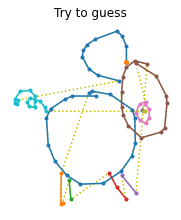

Top-5 predictions:
  1. monkey  20.533%
  2. pig  17.499%
  3. cow  16.249%
  4. teddy-bear  7.812%
  5. panda  7.424%
Answer: pig


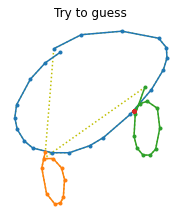

Top-5 predictions:
  1. skateboard  89.048%
  2. cannon  1.704%
  3. headphones  1.397%
  4. van  0.814%
  5. mushroom  0.644%
Answer: skateboard


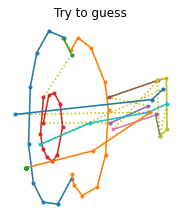

Top-5 predictions:
  1. guitar  38.645%
  2. tennis racquet  11.155%
  3. violin  3.392%
  4. bicycle  2.339%
  5. trombone  2.305%
Answer: guitar


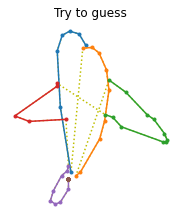

Top-5 predictions:
  1. parrot  26.790%
  2. penguin  9.169%
  3. kangaroo  8.271%
  4. octopus  5.435%
  5. giraffe  4.583%
Answer: penguin


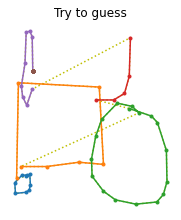

Top-5 predictions:
  1. bicycle  16.050%
  2. crab  11.723%
  3. motorbike  7.285%
  4. pig  6.866%
  5. binoculars  6.219%
Answer: tractor


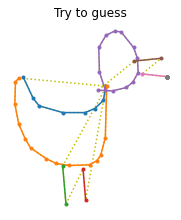

Top-5 predictions:
  1. stethoscope  22.379%
  2. teapot  9.410%
  3. drums  7.653%
  4. coffee cup  7.420%
  5. mermaid  7.325%
Answer: duck


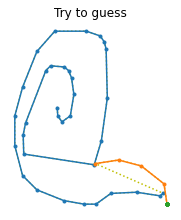

Top-5 predictions:
  1. snail  49.836%
  2. paper clip  5.987%
  3. hot dog  4.706%
  4. garden hose  4.533%
  5. trombone  3.085%
Answer: snail


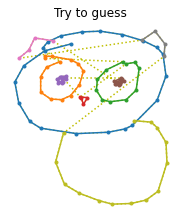

Top-5 predictions:
  1. owl  23.131%
  2. pig  18.435%
  3. panda  7.527%
  4. cow  4.466%
  5. bear  4.238%
Answer: owl


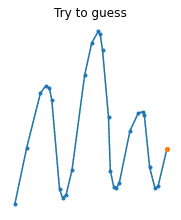

Top-5 predictions:
  1. squiggle  30.190%
  2. roller coaster  19.657%
  3. mountain  18.796%
  4. zigzag  9.940%
  5. ocean  8.495%
Answer: mountain


In [21]:
n_new = 10
Y_probas = model.predict(sketches)
top_k = tf.nn.top_k(Y_probas, k=5)
for index in range(n_new):
  plt.figure(figsize=(3, 3.5))
  draw_sketch(sketches[index])
  plt.show()
  print("Top-5 predictions:".format(index +1))
  for k in range(5):
    class_name = class_names[top_k.indices[index, k]]
    proba = 100 * top_k.values[index, k]
    print("  {}. {} {: .3f}%".format(k+1,class_name, proba))
  print("Answer: {}".format(class_names[labels[index].numpy()]) )

In [22]:
model.save("my_sketchrnn")

INFO:tensorflow:Assets written to: my_sketchrnn\assets


INFO:tensorflow:Assets written to: my_sketchrnn\assets


## Exercise #9

Download the Bach chorales dataset and unzip it. It is composed of 382 chorales composed by Johann Sebastian Bach. Each chorale is 100 to 640 times steps long, and each time step contains 4 integers, where each integer corresponds to a note’s index on a piano (except for the value 0, which means that no note is played). Train a model — recurrent, convolutional, or both — that can predict the next time step (four notes), given a sequence of time steps from a chorale. Then use this model to generate Bach-like music, one note at a time: you can do this by giving the model the start of a chorale an asking it to predict the next time step, then appending these time steps to the input sequence and asking the model for the next note, and so on. Also make sure to check out Google’s Coconet model, which was used for a nice Google doodle about Bach.

In [23]:
DONWLOAD_ROOT = "https://github.com/ageron/handson-ml2/raw/master/datasets/jsb_chorales/"
FILENAME = "jsb_chorales.tgz"
filepath = keras.utils.get_file(FILENAME, 
                                DOWNLOAD_ROOT + FILENAME,
                                cache_subdir="datasets/jsb_chorales",
                                extract=True)

In [25]:
jsb_chorales_dir = Path(filepath).parent
train_files = sorted(jsb_chorales_dir.glob("train/chorale_*.csv"))
valid_files = sorted(jsb_chorales_dir.glob("valid/chorale_*.csv"))
test_files = sorted(jsb_chorales_dir.glob("test/chorale_*.csv"))

In [27]:
def load_chorales(filepaths):
  return [pd.read_csv(filepath).values.tolist() for filepath in filepaths]

train_chorales = load_chorales(train_files)
valid_chorales = load_chorales(valid_files)
test_chorales = load_chorales(test_files)

In [28]:
train_chorales[0]

[[74, 70, 65, 58],
 [74, 70, 65, 58],
 [74, 70, 65, 58],
 [74, 70, 65, 58],
 [75, 70, 58, 55],
 [75, 70, 58, 55],
 [75, 70, 60, 55],
 [75, 70, 60, 55],
 [77, 69, 62, 50],
 [77, 69, 62, 50],
 [77, 69, 62, 50],
 [77, 69, 62, 50],
 [77, 70, 62, 55],
 [77, 70, 62, 55],
 [77, 69, 62, 55],
 [77, 69, 62, 55],
 [75, 67, 63, 48],
 [75, 67, 63, 48],
 [75, 69, 63, 48],
 [75, 69, 63, 48],
 [74, 70, 65, 46],
 [74, 70, 65, 46],
 [74, 70, 65, 46],
 [74, 70, 65, 46],
 [72, 69, 65, 53],
 [72, 69, 65, 53],
 [72, 69, 65, 53],
 [72, 69, 65, 53],
 [72, 69, 65, 53],
 [72, 69, 65, 53],
 [72, 69, 65, 53],
 [72, 69, 65, 53],
 [74, 70, 65, 46],
 [74, 70, 65, 46],
 [74, 70, 65, 46],
 [74, 70, 65, 46],
 [75, 69, 63, 48],
 [75, 69, 63, 48],
 [75, 67, 63, 48],
 [75, 67, 63, 48],
 [77, 65, 62, 50],
 [77, 65, 62, 50],
 [77, 65, 60, 50],
 [77, 65, 60, 50],
 [74, 67, 58, 55],
 [74, 67, 58, 55],
 [74, 67, 58, 53],
 [74, 67, 58, 53],
 [72, 67, 58, 51],
 [72, 67, 58, 51],
 [72, 67, 58, 51],
 [72, 67, 58, 51],
 [72, 65, 57